In [235]:
from __future__ import print_function, division, unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

import numpy as np

import pygeopressure as ppp
import lasio
import os

In [236]:
# set to the directory on your computer
SURVEY_FOLDER = "C:/Users/Sudeep/Desktop/test_survey"

survey = ppp.Survey(SURVEY_FOLDER)

'No well named cug1'


In [237]:
survey.wells

{'CUG1': <pygeopressure.basic.well.Well at 0x2af2ac53d30>}

In [238]:
well_cug1 = survey.wells['CUG1']

In [239]:
las = lasio.read('C:/Users/Sudeep/Desktop/159-13 Logs.las')
las_df = las.df()
las_df.reset_index(inplace=True)
las_df=las_df.rename(columns = {'DEPTH':'Depth(m)','RHOB':'Density(g/cm3)','DT-CKS':'DT-CKS(us/ft)'})
las_df['Velocity(m/s)'] = 304800/las_df['DT-CKS(us/ft)']
las_df

,Depth(m),CALI,DT-CKS(us/ft),DT,GR,NPHI,PHIF,RFT,Density(g/cm3),RT,SAND,SP,SW,VSH,Velocity(m/s)
0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13119,1999.3356,18.313,140.7035,-1003.5,42.625,0.5562,NaN,NaN,1.7725,NaN,NaN,142.25,NaN,NaN,2166.257414
13120,1999.4880,18.797,140.7047,-1003.5,40.531,0.5322,NaN,NaN,1.7627,NaN,NaN,141.75,NaN,NaN,2166.238939
13121,1999.6404,16.547,140.7175,-1003.5,42.563,0.4956,NaN,NaN,1.7500,NaN,NaN,143.62,NaN,NaN,2166.041892
13122,1999.7928,17.953,140.7212,-1908.0,36.344,0.4902,NaN,NaN,1.8018,NaN,NaN,143.12,NaN,NaN,2165.984940


In [240]:
well_cug1.data_frame =las_df
well_cug1.logs

['CALI',
 'DT-CKS',
 'DT',
 'GR',
 'NPHI',
 'PHIF',
 'RFT',
 'Density',
 'RT',
 'SAND',
 'SP',
 'SW',
 'VSH',
 'Velocity']

In [241]:
den_log = well_cug1.get_log('Density')

C:\Users\Sudeep\anaconda3\envs\ENV\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


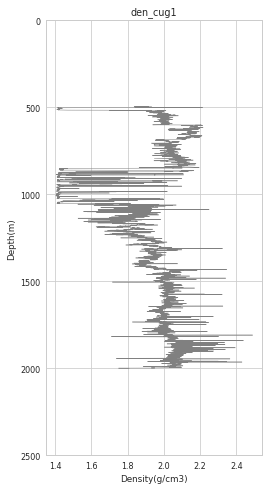

In [242]:
fig_den, ax_den = plt.subplots()
ax_den.invert_yaxis()

den_log.plot(ax_den)

# set style
ax_den.set(ylim=(2500,0), aspect=(1.2/2500)*2)
fig_den.set_figheight(8)
fig_den.show()

In [243]:
a, b = ppp.optimize_traugott(
    den_log, 1000, 1500, kb=well_cug1.kelly_bushing, wd=well_cug1.water_depth)

C:\Users\Sudeep\anaconda3\envs\ENV\lib\site-packages\pygeopressure\pressure\obp.py:41: RuntimeWarning: invalid value encountered in power
  return 1.70 + a * z**b
C:\Users\Sudeep\anaconda3\envs\ENV\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


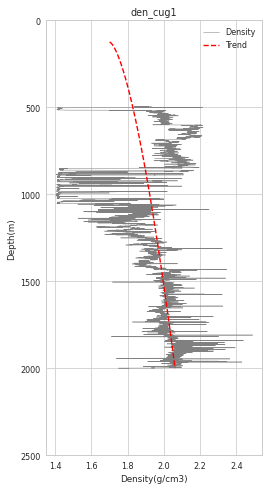

In [244]:
fig_den, ax_den = plt.subplots()
ax_den.invert_yaxis()
# draw density log
den_log.plot(ax_den, label='Density')
# draw fitted density trend line
den_trend = ppp.traugott_trend(
    np.array(den_log.depth), a, b,
    kb=well_cug1.kelly_bushing, wd=well_cug1.water_depth)

ax_den.plot(den_trend, den_log.depth,
            color='r', linestyle='--', zorder=2, label='Trend')

# set style
ax_den.set(ylim=(2500,0), aspect=(1.2/2500)*2)
ax_den.legend()
fig_den.set_figheight(8)
fig_den.show()

In [245]:
den_log_filter = ppp.upscale_log(den_log, freq=20)

den_log_filter_smooth = ppp.smooth_log(den_log_filter, window=1501)

C:\Users\Sudeep\anaconda3\envs\ENV\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


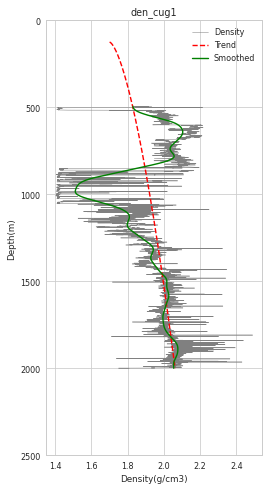

In [246]:
fig_den, ax_den = plt.subplots()
ax_den.invert_yaxis()
# draw density log
den_log.plot(ax_den, label='Density')
# draw fitted density trend line
ax_den.plot(den_trend, den_log.depth,
            color='r', linestyle='--', zorder=2, label='Trend')
# draw processed density log
ax_den.plot(den_log_filter_smooth.data, den_log_filter_smooth.depth,
            color='g', zorder=3, label='Smoothed')

# set style
ax_den.set(ylim=(2500,0), aspect=(1.2/2500)*2)
ax_den.legend()
fig_den.set_figheight(8)
fig_den.show()

In [247]:
extra_log = ppp.extrapolate_log_traugott(
    den_log_filter_smooth, a, b,
    kb=well_cug1.kelly_bushing, wd=well_cug1.water_depth)

C:\Users\Sudeep\anaconda3\envs\ENV\lib\site-packages\pygeopressure\pressure\obp.py:41: RuntimeWarning: invalid value encountered in power
  return 1.70 + a * z**b


C:\Users\Sudeep\anaconda3\envs\ENV\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


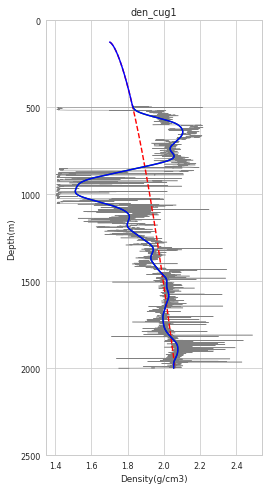

In [248]:
fig_den, ax_den = plt.subplots()
ax_den.invert_yaxis()
# draw density log
den_log.plot(ax_den, label='Density')
# draw trend line
ax_den.plot(den_trend, den_log.depth,
            color='r', linestyle='--', zorder=2, label='Trend')
# draw processed density log
ax_den.plot(den_log_filter_smooth.data, den_log_filter_smooth.depth,
            color='g', zorder=3, label='Smoothed')
# draw extrapolated density
ax_den.plot(extra_log.data, extra_log.depth,
            color='b', zorder=4, label='Extrapolated')

# set style
ax_den.set(ylim=(2500,0), aspect=(1.2/2500)*2)
fig_den.set_figheight(8)
fig_den.show()

In [249]:
obp_log = ppp.obp_well(extra_log,
         kb=well_cug1.kelly_bushing, wd=well_cug1.water_depth,
         rho_w=1.01)

In [250]:
well_cug1.add_log(obp_log, name="Overburden_Pressure", unit = 'MPa')
well_cug1.logs

['CALI',
 'DT-CKS',
 'DT',
 'GR',
 'NPHI',
 'PHIF',
 'RFT',
 'Density',
 'RT',
 'SAND',
 'SP',
 'SW',
 'VSH',
 'Velocity',
 'Overburden_Pressure']

In [251]:
 hydro_log = ppp.hydrostatic_well(
  obp_log.depth, kb=well_cug1.kelly_bushing, wd=well_cug1.water_depth,
     rho_f=1., rho_w=1.)

hydro_log = well_cug1.hydro_log()

C:\Users\Sudeep\anaconda3\envs\ENV\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


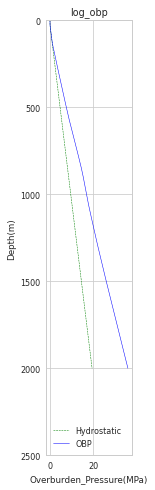

In [252]:
fig_obp, ax_obp = plt.subplots()
ax_obp.invert_yaxis()

hydro_log.plot(ax_obp, color='g', linestyle='--', label='Hydrostatic')

obp_log.plot(ax_obp, color='b', label='OBP')

# set style
ax_obp.set(ylim=(2500,0), aspect=(100/2500)*2)
ax_obp.legend()
fig_obp.set_figheight(8)
fig_obp.show()

In [253]:
well_cug1.add_log(hydro_log, name="Hydrostatic_Pressure", unit = 'MPa')
well_cug1.logs

['CALI',
 'DT-CKS',
 'DT',
 'GR',
 'NPHI',
 'PHIF',
 'RFT',
 'Density',
 'RT',
 'SAND',
 'SP',
 'SW',
 'VSH',
 'Velocity',
 'Overburden_Pressure',
 'Hydrostatic_Pressure']

# Eaton's Method For Pore Pressure Calculation

In [254]:
vel_log = well_cug1.get_log('Velocity')


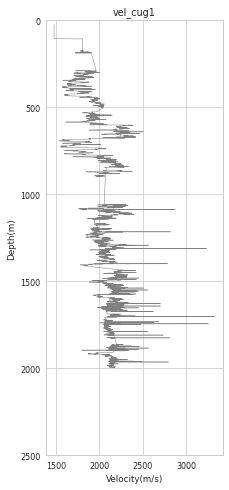

In [255]:
fig_vel, ax_vel = plt.subplots()
ax_vel.invert_yaxis()
vel_log.plot(ax_vel)


# set fig style
ax_vel.set(ylim=(2500,0), aspect=(2500/4600)*2)
ax_vel.set_aspect(2)
fig_vel.set_figheight(8)

In [256]:
a, b = ppp.optimize_nct(
    vel_log=well_cug1.get_log("Velocity"),
    fit_start=1500,
    fit_stop=2000)

In [257]:
from pygeopressure.velocity.extrapolate import normal_log
nct_log = normal_log(vel_log, a=a, b=b)

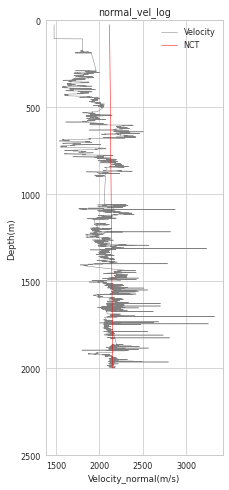

In [258]:
fig_vel, ax_vel = plt.subplots()
ax_vel.invert_yaxis()
# plot velocity
vel_log.plot(ax_vel, label='Velocity')
# plot horizon

# plot fitted nct
nct_log.plot(ax_vel, color='r', zorder=2, label='NCT')

# set fig style
ax_vel.set(ylim=(2500,0), aspect=(2500/4600)*2)
ax_vel.set_aspect(2)
ax_vel.legend()
fig_vel.set_figheight(8)

In [277]:
well_cug1.params['nct'] = {"a": a, "b": b}

well_cug1.save_params()

# 2. Optimize for Eaton’s exponent n
First, we need to preprocess velocity.

Velocity log processing (filtering and smoothing):

In [259]:
vel_log_filter = ppp.upscale_log(vel_log, freq=20)

vel_log_filter_smooth = ppp.smooth_log(vel_log_filter, window=1501)

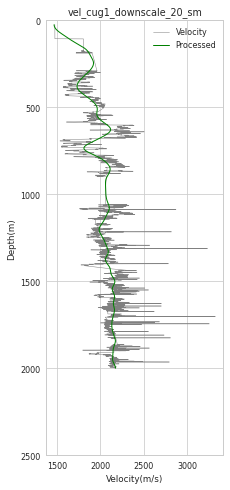

In [260]:
fig_vel, ax_vel = plt.subplots()
ax_vel.invert_yaxis()
# plot velocity
vel_log.plot(ax_vel, label='Velocity')
# plot horizon

# plot processed velocity
vel_log_filter_smooth.plot(ax_vel, color='g', zorder=2, label='Processed', linewidth=1)

# set fig style
ax_vel.set(ylim=(2500,0), aspect=(2500/4600)*2)
ax_vel.set_aspect(2)
ax_vel.legend()
fig_vel.set_figheight(8)

# 3.Predict pore pressure using Eaton’s method

In [286]:
pres_eaton_log = well_cug1.eaton(vel_log_filter_smooth, n=3)

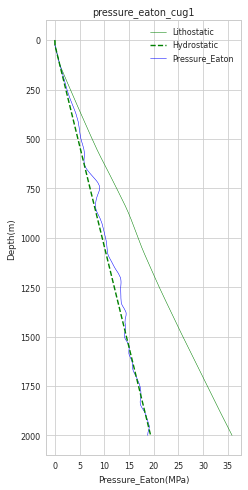

In [287]:
fig_pres, ax_pres = plt.subplots()
ax_pres.invert_yaxis()

well_cug1.get_log("Overburden_Pressure").plot(ax_pres, 'g', label='Lithostatic')
ax_pres.plot(well_cug1.hydrostatic, well_cug1.depth, 'g', linestyle='--', label="Hydrostatic")
pres_eaton_log.plot(ax_pres, color='blue', label='Pressure_Eaton')


# set figure and axis size
ax_pres.set_aspect(2/50)
ax_pres.legend()
fig_pres.set_figheight(8)